## **Gamma Variation Heuristic**

In [1]:
## import essential modules 
import qumcmc 
from qumcmc.basic_utils import *
# from qumcmc.energy_models import IsingEnergyFunction
from qumcmc.energy_models import IsingEnergyFunction, Exact_Sampling

from qumcmc.classical_mcmc_routines import classical_mcmc
from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc     #for Qulacs Simulator backend (** Faster )
# from qumcmc.quantum_mcmc_routines_qiskit import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 

from qumcmc.trajectory_processing import calculate_running_js_divergence, calculate_running_kl_divergence, calculate_runnning_magnetisation, get_trajectory_statistics


In [2]:
import pickle
import seaborn as sns
sns.set()

### **Cardinality Dataset**

In [13]:
size = 4; card = 2
DATA = get_cardinality_dataset(size, card); wts = hebbing_learning(DATA); print(DATA)

['0011', '0101', '0110', '1001', '1010', '1100']


<Axes: >

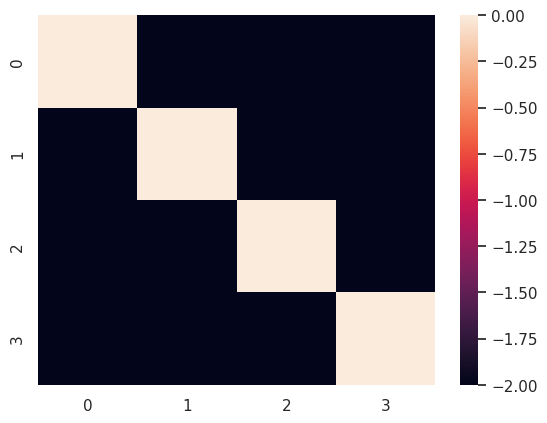

In [14]:
sns.heatmap(wts)

### **Need to include the self interaction (bias, h) into the energy model!**

In [15]:
# define the model
np.random.seed(610358)# should always be in the same cell!  ## best seed -> 610358
n_spins = size*size

## construct problem Hamiltonian ##
shape_of_J=(n_spins,n_spins)

#evaluating J for BAS dataset
J=-1*wts   #np.array([[0,0,0,4],[0,0,4,0],[0,4,0,0],[4,0,0,0]])

# defining h
h=np.zeros(np.shape(J)[0])

# instantiate the model
model=IsingEnergyFunction(J,h,name=f"Cardinality Data of size {size}")

            MODEL : Cardinality Data of size 4
Non-zero Interactions (J) : 6 / 6
Non-zero Bias (h) : 0 / 4
---------------------------------------------
Average Interaction Strength <|J|> :  1.5
Average Bias Strength <|h|>:  0.0
alpha :  0.4082482904638631
---------------------------------------------


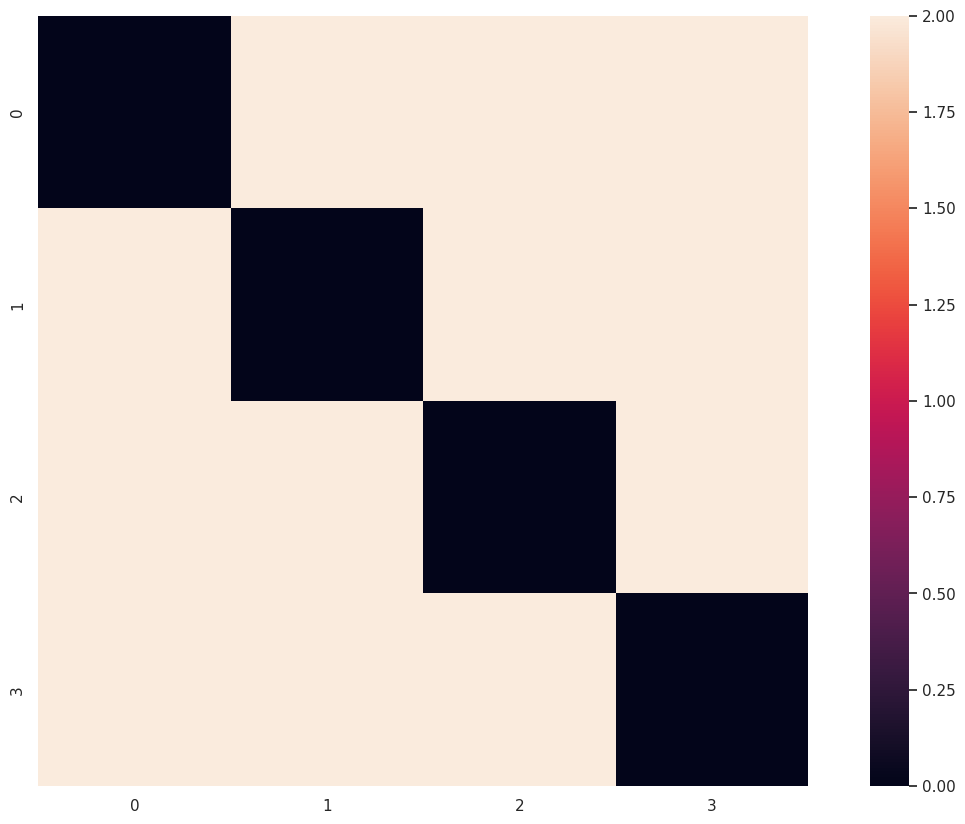

In [16]:
model.model_summary()

     MODEL : Cardinality Data of size 4 |  beta : 1
Num Most Probable States : 16
Entropy : 2.7573388201725257
---------------------------------------------


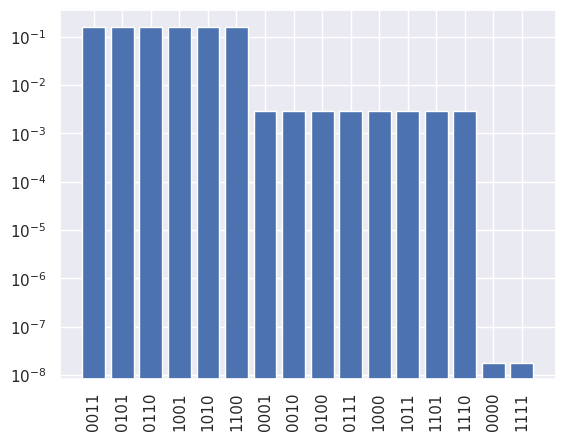

In [17]:
## set current beta
beta = 1#1.100209

## run exact sampling over all possible configurations 
exact_sampled_model = Exact_Sampling(model, beta)

## get the distribution from model
bpd = exact_sampled_model.boltzmann_pd

## exact sampling summary
exact_sampled_model.sampling_summary(show_threshold=1e-10)
plt.yscale("log")
